In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X,y = load_iris(return_X_y=True)

In [3]:
df= pd.DataFrame(data=np.c_[X, y], columns=load_iris().feature_names+['target'])

In [4]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [5]:
df['target'] = [load_iris().target_names[int(i)] for i in df['target']]

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['target'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

In [8]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='target', ylabel='count'>

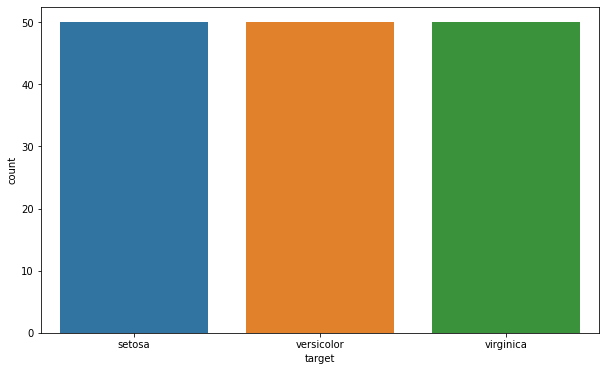

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(df['target'])

In [10]:
## birçok özelliği görebilmek için describe

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
## pandas-melt
melted= pd.melt(df, id_vars='target', var_name='features', value_name='value')

In [13]:
melted.head(25)

,target,features,value
0,setosa,sepal length (cm),5.1
1,setosa,sepal length (cm),4.9
2,setosa,sepal length (cm),4.7
3,setosa,sepal length (cm),4.6
4,setosa,sepal length (cm),5.0
5,setosa,sepal length (cm),5.4
6,setosa,sepal length (cm),4.6
7,setosa,sepal length (cm),5.0
8,setosa,sepal length (cm),4.4
9,setosa,sepal length (cm),4.9


In [14]:
len(melted)##satır sayısı

600

<AxesSubplot:xlabel='features', ylabel='value'>

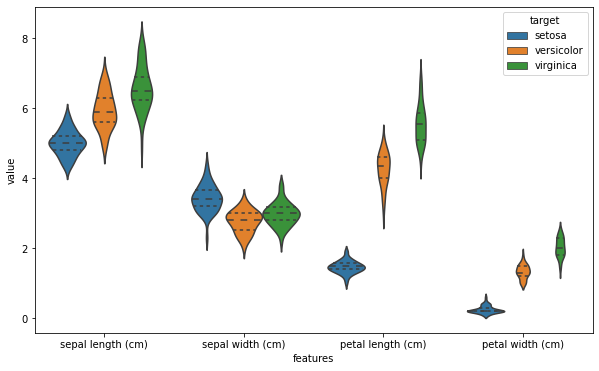

In [15]:
##Keman grafiğine bakalım feature sayım az!set set görselleştirmem daha mantıklı
plt.figure(figsize=(10,6))
sns.violinplot(x='features', y='value', hue='target', data=melted, inner='quart')

In [16]:
## eğer bir sınıflandırma yapacaksam petal,sepal dan bana daha fazla yardımcı olacak

<AxesSubplot:xlabel='features', ylabel='value'>

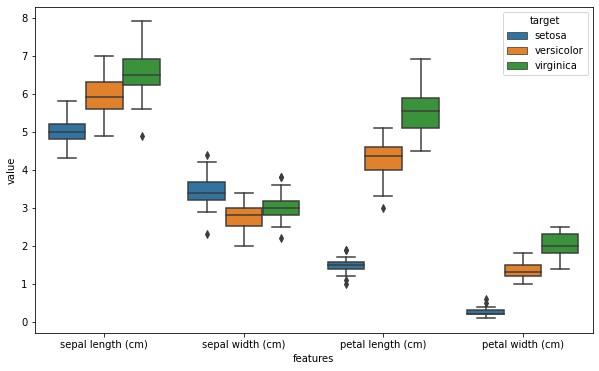

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='features', y='value',hue='target', data=melted)

<AxesSubplot:xlabel='features', ylabel='value'>

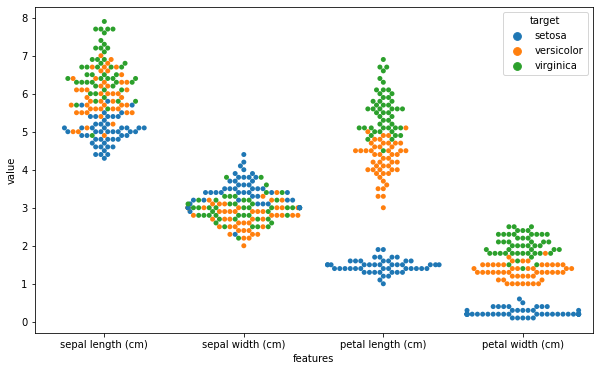

In [18]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='features',y='value', hue='target',data=melted)

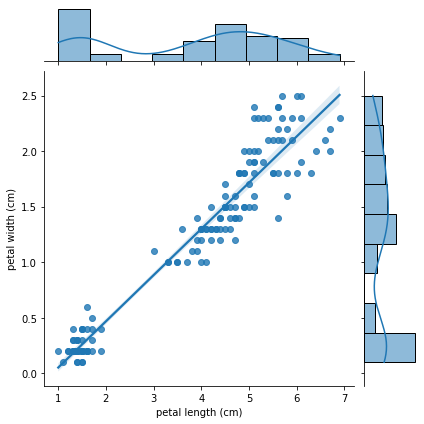

In [20]:
sns.jointplot(df.loc[:, 'petal length (cm)'], df.loc[:, 'petal width (cm)'], kind='reg') 
#kind burada çizdiğimiz grafik türünü belirtir.

<AxesSubplot:>

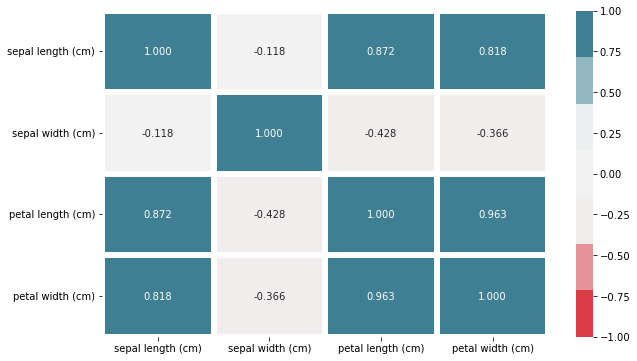

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, linewidths=6,fmt='.3f', cmap=sns.diverging_palette(10,220,sep=80,n=7),vmax=1,vmin=-1 )

In [24]:
 ##diagonalin 1 olmasını bekliyorum çünkü bir feature ın kendisiyle
 ## korelasyonun 1 olması gerekli.
    
##Makine öğrenmesinde birbirleriyle yüksek korelasyon varsa aralarında bunlar üzerinde sonucun yani tahminlerin daha kaliteli olabilmesi için bu featurelardan birini düşürmemiz gerekir.    